<a href="https://colab.research.google.com/github/pdrzxzz/Simple-Q-Learning/blob/main/Simple_Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transition Matrices

In [60]:
import numpy as np
import pandas as pd

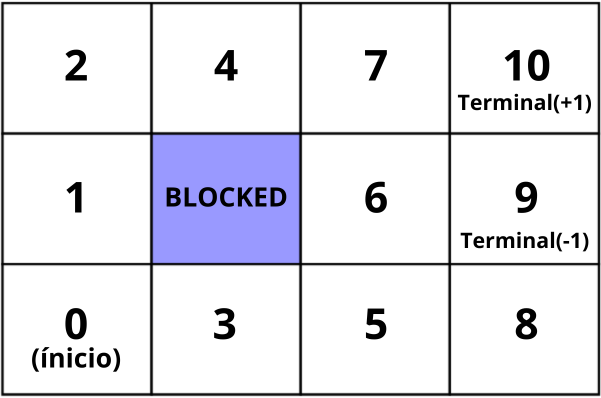

In [61]:
from IPython.display import Image
Image("problem.png")

In [62]:
# Create empty transition matrices for each action
T = {
    "up":    np.zeros((11, 11)),
    "down":  np.zeros((11, 11)),
    "left":  np.zeros((11, 11)),
    "right": np.zeros((11, 11))
}

# Fill the matrices with the transition probabilites

# === UP ===
T["up"][0, 3] = 0.1 # For example, if current_state = 0 and going up, the chance of going to state 3 is 0.1,
T["up"][0, 0] = 0.1 # to state 0 is also 0.1,
T["up"][0, 1] = 0.8 # and to state 1 is 0.8 (total 1.0).
T["up"][1, 1] = 0.2
T["up"][1, 2] = 0.8
T["up"][2, 4] = 0.1
T["up"][2, 2] = 0.9
T["up"][3, 5] = 0.1
T["up"][3, 3] = 0.8
T["up"][3, 0] = 0.1
T["up"][4, 7] = 0.1
T["up"][4, 2] = 0.1
T["up"][4, 4] = 0.8
T["up"][5, 8] = 0.1
T["up"][5, 3] = 0.1
T["up"][5, 6] = 0.8
T["up"][6, 9] = 0.1
T["up"][6, 6] = 0.1
T["up"][6, 7] = 0.8
T["up"][7, 10] = 0.1
T["up"][7, 4] = 0.1
T["up"][7, 7] = 0.8
T["up"][8, 8] = 0.1
T["up"][8, 5] = 0.1
T["up"][8, 9] = 0.8

# === DOWN ===
T["down"][0, 0] = 0.9
T["down"][0, 3] = 0.1
T["down"][1, 0] = 0.8
T["down"][1, 1] = 0.2
T["down"][2, 1] = 0.8
T["down"][2, 2] = 0.1
T["down"][2, 4] = 0.1
T["down"][3, 0] = 0.1
T["down"][3, 5] = 0.1
T["down"][3, 3] = 0.8
T["down"][4, 4] = 0.8
T["down"][4, 2] = 0.1
T["down"][4, 7] = 0.1
T["down"][5, 5] = 0.8
T["down"][5, 3] = 0.1
T["down"][5, 8] = 0.1
T["down"][6, 5] = 0.8
T["down"][6, 6] = 0.1
T["down"][6, 9] = 0.1
T["down"][7, 6] = 0.8
T["down"][7, 4] = 0.1
T["down"][7, 10] = 0.1
T["down"][8, 8] = 0.9
T["down"][8, 5] = 0.1

# === LEFT ===
T["left"][0, 0] = 0.9
T["left"][0, 1] = 0.1
T["left"][1, 0] = 0.1
T["left"][1, 2] = 0.1
T["left"][1, 1] = 0.8
T["left"][2, 2] = 0.9
T["left"][2, 1] = 0.1
T["left"][3, 0] = 0.8
T["left"][3, 3] = 0.2
T["left"][4, 2] = 0.8
T["left"][4, 4] = 0.2
T["left"][5, 3] = 0.8
T["left"][5, 5] = 0.1
T["left"][5, 6] = 0.1
T["left"][6, 6] = 0.8
T["left"][6, 5] = 0.1
T["left"][6, 7] = 0.1
T["left"][7, 4] = 0.8
T["left"][7, 7] = 0.1
T["left"][7, 6] = 0.1
T["left"][8, 5] = 0.8
T["left"][8, 8] = 0.1
T["left"][8, 9] = 0.1

# === RIGHT ===
T["right"][0, 3] = 0.8
T["right"][0, 0] = 0.1
T["right"][0, 1] = 0.1
T["right"][1, 1] = 0.8
T["right"][1, 0] = 0.1
T["right"][1, 2] = 0.1
T["right"][2, 4] = 0.8
T["right"][2, 2] = 0.1
T["right"][2, 1] = 0.1
T["right"][3, 5] = 0.8
T["right"][3, 3] = 0.2
T["right"][4, 7] = 0.8
T["right"][4, 4] = 0.2
T["right"][5, 8] = 0.8
T["right"][5, 5] = 0.1
T["right"][5, 6] = 0.1
T["right"][6, 9] = 0.8
T["right"][6, 5] = 0.1
T["right"][6, 7] = 0.1
T["right"][7, 10] = 0.8
T["right"][7, 6] = 0.1
T["right"][7, 7] = 0.1
T["right"][8, 9] = 0.1
T["right"][8, 8] = 0.9

# Check if each row in each transition matrix sums exactly to 1.0 (if it has transitions)
error_found = False

for action_name, matrix in T.items():
    for state_index, row in enumerate(matrix):
        total_prob = row.sum()

        # Ignore rows with no outgoing transitions
        if total_prob == 0:
            continue

        # Check for exact match with 1.0
        if total_prob != 1.0:
            print(f"⚠️ Warning: action='{action_name}', state={state_index}, total probability = {total_prob}")
            error_found = True

# If no errors were found, print success message
if not error_found:
    print("✅ All transition probabilities are correct.")


✅ All transition probabilities are correct.


# AUXILIARY FUNCTIONS

## Stochastic Transition Simulation

In [63]:
def calc_action_result(transition_state):
    """
    Given a transition probability vector for all possible next states,
    returns the next state chosen stochastically based on the distribution.

    Parameters:
        transition_state (ndarray): 1D array with probabilities for each state.

    Returns:
        int: The index of the selected next state.
    """
    # Get the indices of candidate states (with probability > 0)
    possible_states = np.where(transition_state != 0)[0]  # e.g. [0, 0.1, 0.9, 0] → [1, 2]

    # Get the probabilities of the candidate states
    probabilities = transition_state[possible_states]     # e.g. [0.1, 0.9]

    # Sort the probabilities and get the sorted indices
    sorted_indices = np.argsort(probabilities)
    sorted_states = possible_states[sorted_indices]
    sorted_probabilities = probabilities[sorted_indices]

    # Build the cumulative probability distribution (roulette)
    roulette = np.cumsum(sorted_probabilities)

    # Draw a number between 0 and 1
    random_value = np.random.uniform()

    # Find the first index in the cumulative distribution where the accumulated probability exceeds random_value
    chosen_index = np.where(roulette > random_value)[0][0]

    # Return the chosen state
    return sorted_states[chosen_index]


In [64]:
def choose_best_action(q_table, current_state):
    """
    Returns the index of the best action (highest Q-value) for the given state.

    Parameters:
        q_table (ndarray): 2D array where q_table[state][action] holds the Q-value.
        current_state (int): Index of the current state.

    Returns:
        int: Index of the best known action (0 = UP, 1 = DOWN, 2 = LEFT, 3 = RIGHT).
    """
    return np.argmax(q_table[current_state])

Regra de Aprendizagem

In [65]:
def q_update(q_table, current_state, next_state_probs, action, reward, learning_rate, discount_factor):
    """
    Updates the Q-table using the Q-learning formula. This function implements the core Q-learning
    update step, incorporating the observed reward and estimated future rewards.

    Parameters:
        q_table (ndarray): The Q-table, a 2D array where q_table[state][action] holds the
                           estimated maximum future rewards for taking action in a given state.
        current_state (int): The index of the state the agent is currently in.
        next_state_probs (ndarray): A 1D array representing the probability distribution
                                    over possible next states after taking the chosen action
                                    from the current state.
        action (int): The index of the action taken by the agent in the current state.
        reward (float): The immediate reward received after taking the action and transitioning
                        to the next state.
        learning_rate (float): Alpha (α), a value between 0 and 1. It determines how much the
                               new information (the difference between the estimated future reward
                               and the current Q-value) impacts the current Q-value. A higher
                               alpha means faster learning but can lead to instability.
        discount_factor (float): Gamma (γ), a value between 0 and 1. It discounts the value
                                 of future rewards. A higher gamma means the agent considers
                                 future rewards more important, while a lower gamma focuses
                                 more on immediate rewards.

    Returns:
        None. The q_table is updated in place.
    """
    # Simulate the result of taking the action: choose next state probabilistically
    next_state = calc_action_result(next_state_probs)

    # Get the best Q-value for the next state
    best_future_q = np.max(q_table[next_state])

    # Apply the Q-learning update rule
    q_table[current_state, action] += learning_rate * (
        reward + discount_factor * best_future_q - q_table[current_state, action]
    )


In [66]:
def simulate_policy(q_table, reward_vector):
    """
    Executes the learned policy starting from the initial state (0)
    and returns the total accumulated reward until reaching a terminal state.

    Parameters:
        q_table (ndarray): Q-values table with shape [state][action].
        reward_vector (ndarray): Reward for each state (size = number of states).

    Returns:
        float: Total reward accumulated by following the greedy policy.
    """

    total_reward = 0  # Initial reward accumulator
    state = 0         # Start from state 0
    terminal = False  # Flag to check if episode ended

    while not terminal:
        # Select the best action in the current state (greedy policy)
        action_index = choose_best_action(q_table, state)

        # Map the action index to its name
        action_name = ["up", "down", "left", "right"][action_index]

        # Get transition probabilities for the chosen action
        transition_probabilities = T[action_name][state]

        # Sample next state stochastically
        next_state = calc_action_result(transition_probabilities)

        # Log current step
        print(f"{state} {action_name} {next_state}")

        # Accumulate reward of resulting state
        total_reward += reward_vector[next_state]

        # Update state
        state = next_state

        # Check for terminal condition (states 9 or 10)
        if state in [9, 10]:
            terminal = True

    return total_reward


In [81]:
def print_policy(q_table, actions):
    """
    Displays the derived policy from the Q-table using a DataFrame grid layout.

    Parameters:
        q_table (ndarray): Q-values table with shape [state][action].
        actions (list of str): List of action names indexed by action number.
    Returns:
      None, renders a visual layout.
    """

    # Mapping action names to symbols
    symbol_map = {
        "up": "↑",
        "down": "↓",
        "left": "←",
        "right": "→"
    }

    # Derive best actions (indices) and map to symbols
    best_action_indices = np.argmax(q_table, axis=1)
    best_action_names = [actions[i] for i in best_action_indices]
    best_action_symbols = [symbol_map[name] for name in best_action_names]

    # Manually define layout based on your fixed environment
    # Use '' for invalid states, and manually insert special states
    layout = [
        [best_action_symbols[2], best_action_symbols[4], best_action_symbols[7], "+1"],
        [best_action_symbols[1], "X",                    best_action_symbols[6], "-1"],
        [best_action_symbols[0], best_action_symbols[3], best_action_symbols[5], best_action_symbols[8]]
    ]

    df = pd.DataFrame(layout)

    print("\nPolicy layout:")
    print(df.to_string(index=False, header=False))


**INICIALIZAÇÃO**

In [68]:
# Define action names in a consistent order
ACTION_NAMES = ["up", "down", "left", "right"]

# Number of states and actions
NUM_STATES = 11
NUM_ACTIONS = len(ACTION_NAMES)

# Initialize Q-table with zeros
q_table = np.zeros((NUM_STATES, NUM_ACTIONS))

# Define terminal states and set their Q-values explicitly
TERMINAL_STATES = {9: -1, 10: 1}
for state, value in TERMINAL_STATES.items():
    q_table[state, :] = value

# Initialize visit counts for state-action pairs (optional, useful for analysis)
visit_counts = np.zeros((NUM_STATES, NUM_ACTIONS))

# Hyperparameters for Q-learning
ALPHA = 0.2      # Learning rate
GAMMA = 0.5      # Discount factor

# Define reward vector per state with default penalty for non-terminal states
reward_vector = np.full(NUM_STATES, -0.04)
for state, reward in TERMINAL_STATES.items():
    reward_vector[state] = reward


**APRENDIZADO**

In [86]:
# Number of trajectories for environment exploration
num_trajectories = 5000

for i in range(num_trajectories):
    state = 0
    terminal = False

    while not terminal:
        # Choose a random action from the available actions
        action_idx = np.random.choice(len(ACTION_NAMES))
        visit_counts[state, action_idx] += 1  # Update visit count

        action_name = ACTION_NAMES[action_idx]
        transition_probs = T[action_name][state]

        # Update Q-table based on action and transition
        q_update(q_table, state, transition_probs, action_idx, reward_vector[state], ALPHA, GAMMA)

        # Choose the next state based on transition probabilities
        next_state = calc_action_result(transition_probs)

        # Update current state
        state = next_state

        # Check if a terminal state has been reached
        if state in TERMINAL_STATES:
            terminal = True

print(f"{num_trajectories} trajectories done!")

# Display final Q-table formatted with pandas
print("\nFinal Q-table:")
print(pd.DataFrame(q_table, columns=ACTION_NAMES))

# Display the policy derived from the Q-table
print_policy(q_table, ACTION_NAMES)


5000 trajectories done!

Final Q-table:
          up      down      left     right
0  -0.063434 -0.071003 -0.070793 -0.061378
1  -0.053914 -0.068730 -0.064050 -0.064350
2  -0.032365 -0.057298 -0.047146 -0.008520
3  -0.058778 -0.056068 -0.067485 -0.040125
4   0.033502  0.034311 -0.009286  0.163867
5   0.004040 -0.046512 -0.049774 -0.049430
6   0.153494 -0.082865  0.004225 -0.391879
7   0.224965  0.103864  0.069559  0.459900
8  -0.431173 -0.064938 -0.056704 -0.086290
9  -1.000000 -1.000000 -1.000000 -1.000000
10  1.000000  1.000000  1.000000  1.000000

Policy layout:
→ → → +1
↑ X ↑ -1
→ → ↑  ←


In [88]:
print(pd.DataFrame(visit_counts, columns=ACTION_NAMES))

         up     down     left    right
0   13619.0  13518.0  13761.0  13368.0
1   11059.0  10825.0  10976.0  10908.0
2    8115.0   8202.0   8125.0   8233.0
3    9099.0   8943.0   8859.0   9051.0
4    5548.0   5540.0   5298.0   5590.0
5    4574.0   4522.0   4671.0   4490.0
6    2410.0   2399.0   2360.0   2440.0
7    2614.0   2723.0   2615.0   2569.0
8    2326.0   2208.0   2292.0   2264.0
9       0.0      0.0      0.0      0.0
10      0.0      0.0      0.0      0.0


**SIMULANDO A POLÍTICA APRENDIDA**

In [71]:
# Simulando a execução da política a partir do estado inicial ate o estado final alcançado e registrado a recompensa total obtiga pelo agente

r_total = simulate_policy(q_table, reward_vector)

print("Recompensa:", r_total)

0 up 1
1 up 2
2 right 4
4 right 7
7 right 10
Recompensa: 0.84


Obs.: exercícios para praticar

# **ITEM 1:**

* **Treinamento:** Execute o Q Learning variando os parâmetros de alpha e gamma, com cinco opções de valores para cada parâmetro. Obs.: vc pode usar como critério de parada o número de 30 trajetórias ou algum critério de convergência (sobre a matrix Q). Execute o Q Learning 10 vezes para cada combinação de alpha e gamma.

*  **Avaliação:** Para avaliar cada política aprendida, simule a execução da política por várias vezes (por exemplo, 10 vezes) e registre a média da recompensa total recebida.

* Defina assim a melhor configuração de alpha e gamma avaliada.

Tabela de resultados (exemplo):

Alpha | Gamma | Recompensa Total (Media das 100 execuções) | Desvio

0.2   | 0.1   |       xxx                                   |  yyy

0.4   | 0.3   |       xxx                                   |  yyy

0.6   | 0.5   |       xxx                                   |  yyy
etc...




# **ITEM 2:**

* Implemente duas estratégias de exploração de estados, como eps-greedy, Boltzman ou UCB. Execute e avalie o Q Learning com cada uma das estratégias.

* Obs.: para simplificar fixe os valores de alpha e gamma obtidos no item anterior, mas se tiver tempo pode realizar experimentos adicionais. Novamente vc pode usar o número de 30 trajetórias como critério de parada.

* Obs.: A qualidade da estratégia de exploração depende de parâmetros. Avalie opções diferentes de valores.